# CROWDFUNDING ANALYSIS
---

## Tentang Kiva
Kiva adalah sebuah organisasi nirlaba yang berbasis di San Francisco, California, yang bertujuan untuk mengurangi kemiskinan dan meningkatkan kesejahteraan masyarakat di seluruh dunia melalui pinjaman mikro (microfinance). Platform Kiva memungkinkan individu atau kelompok untuk memberikan pinjaman kecil (mulai dari $25) kepada pengusaha, petani, pelajar, atau komunitas yang membutuhkan di negara-negara berkembang.

## Tujuan Kiva Loan
Pinjaman Kiva dirancang untuk:
1. Meningkatkan Akses Keuangan: Memberikan akses ke modal bagi mereka yang tidak memiliki akses ke layanan perbankan tradisional.
2. Mendukung Kewirausahaan: Membantu pengusaha kecil, petani, dan pengrajin untuk mengembangkan bisnis mereka.

3. Meningkatkan Kesejahteraan: Membiayai kebutuhan seperti pendidikan, perumahan, energi bersih, dan perawatan kesehatan.
4. Mendorong Pemberdayaan: Khususnya bagi perempuan dan kelompok marginal lainnya.

### Using Kiva

Deskripsi kolom: 
Berikut adalah deskripsi dari masing-masing kolom:
- `id`: Unique ID untuk masing-masing loan (loan ID)
- `funded_amount`: Jumlah yang dicairkan oleh Kiva ke agen (USD)
- `loan_amount`: Jumlah yang disalurkan oleh agen ke peminjam (USD)
	Keterangan tambahan:
    - `loan_amount` adalah jumlah dana yang dibutuhkan oleh borrower (peminjam).
    - `funded_amount` biasanya sama atau lebih kecil dari loan_amount:
        + Sama: Jika seluruh jumlah yang dibutuhkan berhasil terkumpul.
        + Lebih kecil: Jika belum seluruhnya terkumpul, tetapi Kiva memutuskan tetap mendistribusikan sebagian yang sudah terkumpul.

- `activity`: Kategori lebih spesifik dari `sector`
- `sector`: Kategori dari loan
- `country`: Nama negara lengkap, tempat pinjaman dicairkan
- `region`: Nama wilayah lengkap dari `country`
- `currency`: Mata uang
- `partner_id`: ID untuk organisasi partner
- `posted_time`: Waktu pinjaman di-posting di Kiva oleh agen
- `funded_time`: Waktu pinjaman telah sepenuhnya dibiayai oleh pemberi pinjaman
- `term_in_months`: Durasi pencairan pinjaman (dalam satuan bulan)
- `lender_count`: Banyaknya pemberi pinjaman yang berkontribusi
- `repayment_interval`: Cara pelunasan peminjaman

### Rumusan Masalah
perusahaan Anda ingin masuk sebagai pendana pada kiva ini. Perusahaan Anda berada di Indonesia dan atasan Anda ingin tau kesempatan apa yang bisa diberikan kepada Kiva dan mengetahui resikonya untuk menjadi pendana seperti apa.

In [7]:
# import library
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

#statistics
import statsmodels.api as sm
from scipy.stats import iqr 

import pylab as py 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',200)

import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('kiva_loan.csv')
df.head(2)

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2014-01-02 10:06:32+00:00,12.0,12,irregular
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2014-01-02 09:17:23+00:00,11.0,14,irregular


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country             671205 non-null  object 
 7   region              614405 non-null  object 
 8   currency            671205 non-null  object 
 9   partner_id          657698 non-null  float64
 10  posted_time         671205 non-null  object 
 11  funded_time         622874 non-null  object 
 12  term_in_months      671205 non-null  float64
 13  lender_count        671205 non-null  int64  
 14  repayment_interval  671205 non-null  object 
dtypes: float64(4), int64(2), object(9)

In [10]:
from matplotlib import category


df['country'] = df['country'].astype('category')
df['activity'] = df['activity'].astype('category')
df['sector'] = df['sector'].astype('category')
df['currency'] = df['currency'].astype('category')
df['repayment_interval'] = df['repayment_interval'].astype('category')
df['id'] = df['id'].astype('object')


In [11]:
df['posted_time'] = pd.to_datetime(df['posted_time'])

In [12]:
df['funded_time'] = pd.to_datetime(df['funded_time'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   id                  671205 non-null  object             
 1   funded_amount       671205 non-null  float64            
 2   loan_amount         671205 non-null  float64            
 3   activity            671205 non-null  category           
 4   sector              671205 non-null  category           
 5   use                 666973 non-null  object             
 6   country             671205 non-null  category           
 7   region              614405 non-null  object             
 8   currency            671205 non-null  category           
 9   partner_id          657698 non-null  float64            
 10  posted_time         671205 non-null  datetime64[ns, UTC]
 11  funded_time         622874 non-null  datetime64[ns, UTC]
 12  term_in_months  

In [14]:
df[df['use'].isna()]

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval
140,653375,2975.0,2975.0,Food Production/Sales,Food,NaN,Tanzania,NaN,TZS,87.0,2014-01-02 15:31:52+00:00,2014-01-22 13:42:40+00:00,10.0,110,monthly
145,653427,1200.0,1200.0,Personal Expenses,Personal Use,NaN,Peru,NaN,PEN,139.0,2014-01-02 22:43:24+00:00,2014-02-01 23:49:27+00:00,20.0,44,monthly
170,653177,4250.0,4250.0,Catering,Food,NaN,Tanzania,NaN,TZS,87.0,2014-01-02 06:46:10+00:00,2014-01-23 16:52:15+00:00,10.0,116,monthly
412,653513,2350.0,2350.0,Beauty Salon,Services,NaN,Tanzania,NaN,TZS,87.0,2014-01-03 05:08:11+00:00,2014-01-21 15:33:01+00:00,10.0,75,monthly
414,653775,725.0,725.0,Agriculture,Agriculture,NaN,El Salvador,NaN,USD,199.0,2014-01-03 21:41:23+00:00,2014-01-28 17:28:43+00:00,20.0,19,monthly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671151,1340245,0.0,25.0,Livestock,Agriculture,NaN,Kenya,NaN,KES,138.0,2017-07-20 23:13:01+00:00,NaT,13.0,0,monthly
671174,1340275,0.0,25.0,Games,Entertainment,NaN,Kenya,NaN,KES,138.0,2017-07-21 23:51:18+00:00,NaT,13.0,0,monthly
671178,1340280,0.0,25.0,Livestock,Agriculture,NaN,Kenya,NaN,KES,138.0,2017-07-22 06:16:55+00:00,NaT,13.0,0,monthly
671185,1340298,0.0,25.0,Livestock,Agriculture,NaN,Kenya,NaN,KES,138.0,2017-07-24 07:34:50+00:00,NaT,13.0,0,monthly


Mengubah funded time yang belum ada tanggalnya, diasumsikan karena funded amountnya belum sama dengan loan amount, atau memang dananya belum disalurkan sehingga belum ada tanggalnya.

In [15]:
# df['funded_time'] = df['funded_time'].fillna('-')

Region dan use yang NaN diisi dengan (-), karena disumsikan opsional atau tidak wajib diisi

In [16]:
df['use'] = df['use'].fillna('-')
df['region'] = df['region'].fillna('-')

In [17]:
df['partner_id'] = df['partner_id'].fillna('-')

In [18]:
df['durasi'] = df['funded_time'] - df['posted_time']
df.head(2)

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval,durasi
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2014-01-02 10:06:32+00:00,12.0,12,irregular,1 days 03:53:53
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2014-01-02 09:17:23+00:00,11.0,14,irregular,1 days 02:26:15


In [22]:
df['currency'].unique()

['PKR', 'INR', 'KES', 'NIO', 'USD', ..., 'EGP', 'MGA', 'NAD', 'LSL', 'THB']
Length: 67
Categories (67, object): ['ALL', 'AMD', 'AZN', 'BIF', ..., 'YER', 'ZAR', 'ZMW', 'ZWD']

In [ ]:
if['currency'] == 'PKR':
    

## Data
> Hanya menggunakan data di Indonesia yang jumlah pinjamannya tercapai

In [13]:
df_terpenuhi = df[(df['funded_amount'] == df['loan_amount']) & (df['country'] == 'Indonesia')]
df_terpenuhi.head(2)

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval,durasi
898,654114,1500.0,1500.0,Phone Use Sales,Retail,To process more mobile phone credit sales and ...,Indonesia,Bogor Barat,IDR,219.0,2014-01-06 10:02:08+00:00,2014-01-17 14:08:07+00:00,8.0,51,bullet,11 days 04:05:59
988,654140,825.0,825.0,Utilities,Services,To obtain more float to process mobile phone c...,Indonesia,Bogor Barat,IDR,219.0,2014-01-06 10:55:12+00:00,2014-01-11 23:24:14+00:00,8.0,26,bullet,5 days 12:29:02


In [14]:
df_terpenuhi['amount/lender'] = df_terpenuhi['funded_amount'] / df_terpenuhi['lender_count'] 
df_terpenuhi.head(2)

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval,durasi,amount/lender
898,654114,1500.0,1500.0,Phone Use Sales,Retail,To process more mobile phone credit sales and ...,Indonesia,Bogor Barat,IDR,219.0,2014-01-06 10:02:08+00:00,2014-01-17 14:08:07+00:00,8.0,51,bullet,11 days 04:05:59,29.411765
988,654140,825.0,825.0,Utilities,Services,To obtain more float to process mobile phone c...,Indonesia,Bogor Barat,IDR,219.0,2014-01-06 10:55:12+00:00,2014-01-11 23:24:14+00:00,8.0,26,bullet,5 days 12:29:02,31.730769


In [15]:
df_terpenuhi.to_csv('kiva_terpenuhi.csv', index=False)

In [244]:
df_terpenuhi.groupby(['sector'])[['lender_count']].sum().sort_values(by='lender_count', ascending=False)

,lender_count
sector,
Agriculture,31501
Retail,27840
Housing,26412
Services,14504
Arts,8906
Food,8157
Personal Use,7750
Education,4994
Construction,465


### Data yang digunakan
> Data yang digunakan untuk dianalisis adalah top 3 dari banyaknya peminjam, yaitu Agriculture, Retail, dan Housing

In [16]:
data_agri = df_terpenuhi[df_terpenuhi['sector'] == 'Agriculture']
data_agri.head(2)

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval,durasi,amount/lender
1293,653973,1875.0,1875.0,Pigs,Agriculture,to buy super quality piglets,Indonesia,"Melaya, Bali",IDR,82.0,2014-01-06 03:13:54+00:00,2014-01-07 01:29:24+00:00,7.0,59,irregular,0 days 22:15:30,31.779661
1557,654435,2300.0,2300.0,Pigs,Agriculture,to purchase three super quality piglets.,Indonesia,Badung_Bali_Indonesia,IDR,82.0,2014-01-07 03:01:06+00:00,2014-01-08 23:53:39+00:00,8.0,76,irregular,1 days 20:52:33,30.263158


In [17]:
data_agri.to_csv('data_agri.csv', index=False)

In [18]:
data_retail = df_terpenuhi[df_terpenuhi['sector'] == 'Retail']
data_retail.head(2)

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval,durasi,amount/lender
898,654114,1500.0,1500.0,Phone Use Sales,Retail,To process more mobile phone credit sales and ...,Indonesia,Bogor Barat,IDR,219.0,2014-01-06 10:02:08+00:00,2014-01-17 14:08:07+00:00,8.0,51,bullet,11 days 04:05:59,29.411765
1105,654084,825.0,825.0,Phone Use Sales,Retail,To process more mobile phone credit sales and ...,Indonesia,Bogor Barat,IDR,219.0,2014-01-06 09:13:39+00:00,2014-01-08 17:46:44+00:00,8.0,26,bullet,2 days 08:33:05,31.730769


In [19]:
data_retail.to_csv('data_retail.csv',index=False)

In [20]:
data_housing = df_terpenuhi[df_terpenuhi['sector'] == 'Housing']
data_housing.head(2)

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval,durasi,amount/lender
40776,693520,450.0,450.0,Personal Housing Expenses,Housing,to purchase housing materials such as wood and...,Indonesia,-,IDR,129.0,2014-04-04 09:46:46+00:00,2014-04-25 15:36:20+00:00,38.0,17,monthly,21 days 05:49:34,26.470588
46669,699011,400.0,400.0,Personal Housing Expenses,Housing,"to purchase five cubic feet of sand, stones an...",Indonesia,-,IDR,129.0,2014-04-17 09:42:14+00:00,2014-04-22 01:34:58+00:00,38.0,13,monthly,4 days 15:52:44,30.769231


In [21]:
data_housing.to_csv('data_housing.csv', index=False)

In [160]:
data_retail.describe()

,funded_amount,loan_amount,term_in_months,lender_count,durasi,amount/lender
count,1107.000000,1107.000000,1107.000000,1107.000000,1107,1107.000000
mean,805.216802,805.216802,13.822042,25.149051,17 days 18:56:19.446251129,39.714391
std,1427.501452,1427.501452,5.315196,45.841030,12 days 04:05:17.376573988,59.934012
min,75.000000,75.000000,2.000000,1.000000,0 days 01:07:42,25.000000
25%,325.000000,325.000000,13.000000,10.000000,6 days 08:43:16,26.515152
50%,625.000000,625.000000,14.000000,20.000000,15 days 14:24:21,29.310345
75%,925.000000,925.000000,14.000000,31.000000,29 days 17:53:45,35.319473
max,32000.000000,32000.000000,50.000000,1097.000000,57 days 18:55:13,1050.000000


## Analisis 1
> Analisis top5 aktivitas berdasarkan amount/lender

- note: untuk data housing hanya top2 karena data yang ada untuk data yang sudah disiapkan di awal hanya ada 2 nilai

In [240]:
top5_a = data_agri.groupby('activity')[['amount/lender']].mean().sort_values('amount/lender',ascending=False).head(5).reset_index()
top5_a['activity'] = top5_a['activity'].cat.remove_unused_categories()
top5_a

,activity,amount/lender
0,Agriculture,38.379144
1,Pigs,36.834144
2,Farm Supplies,36.480163
3,Flowers,35.451405
4,Cattle,35.000000


In [250]:
top5_r = data_retail.groupby('activity')[['amount/lender']].mean().sort_values('amount/lender',ascending=False).head(5).reset_index()
top5_r['activity'] = top5_r['activity'].cat.remove_unused_categories()
top5_r

,activity,amount/lender
0,Electronics Sales,75.000000
1,Mobile Phones,56.282045
2,Home Products Sales,43.366652
3,Phone Accessories,41.838147
4,Phone Use Sales,41.193161


In [130]:
top5_h = data_housing.groupby('activity')[['amount/lender']].mean().sort_values('amount/lender',ascending=False).reset_index().head(2)
top5_h['activity'] = top5_h['activity'].cat.remove_unused_categories()
top5_h

,activity,amount/lender
0,Personal Housing Expenses,36.724557
1,Property,32.142857


Text(0.5, 0.98, 'Top 3 Sector di Indonesia')

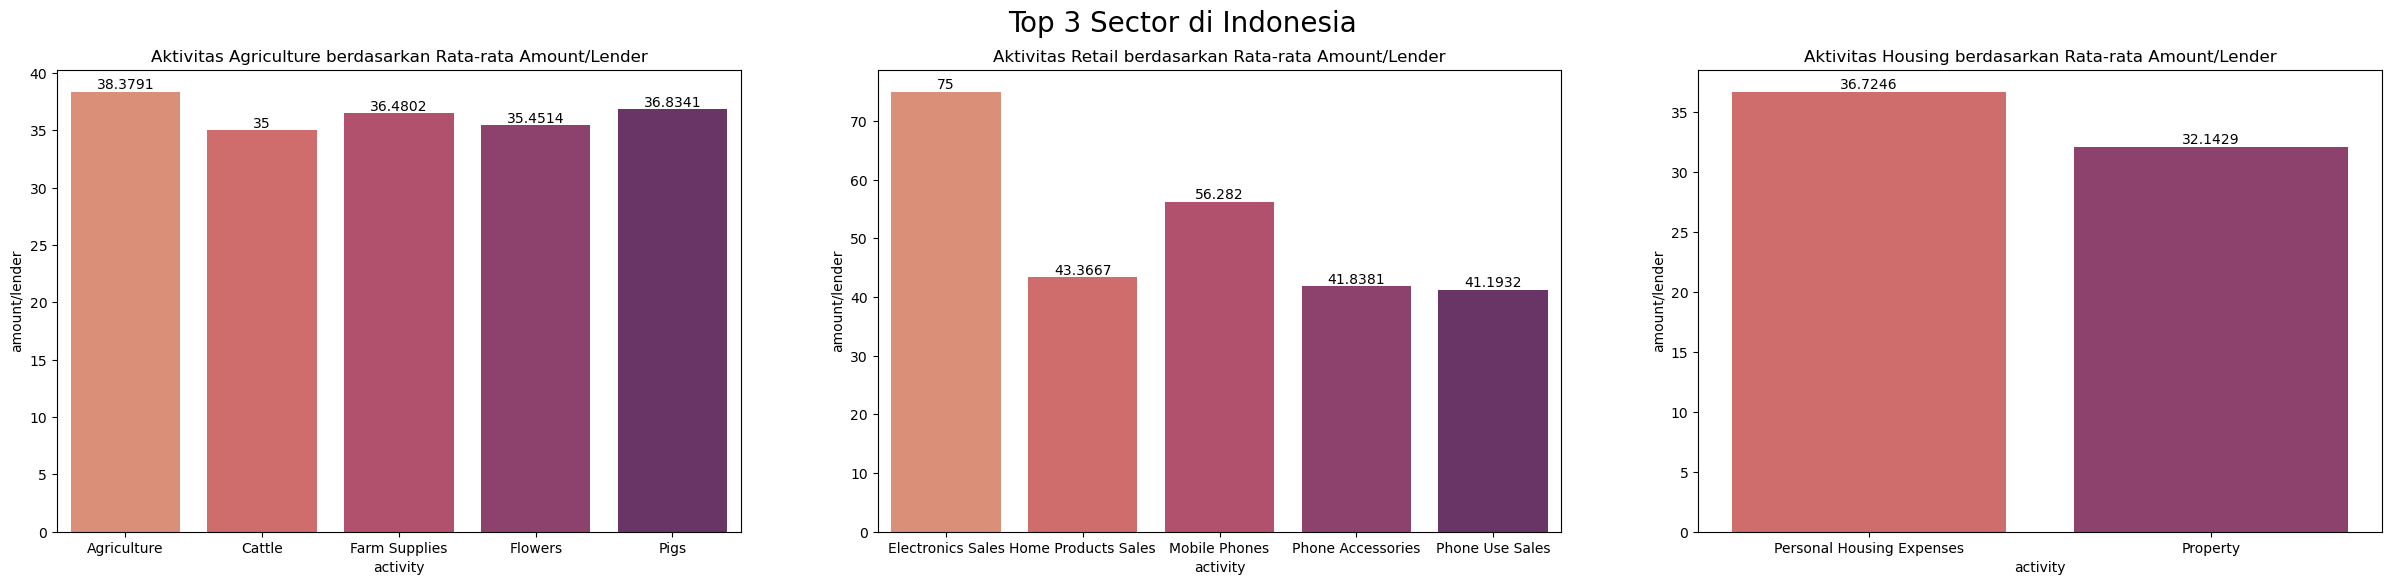

In [131]:
plt.figure(figsize=(30,6))
plt.subplot(1,3,1) # n baris, n kolom, posisition 1
fig1 = sns.barplot(data=top5_a, y='amount/lender', x='activity', palette= 'flare')
plt.title('Aktivitas Agriculture berdasarkan Rata-rata Amount/Lender')
for container in fig1.containers:
    fig1.bar_label(container)

plt.subplot(1,3,2) # n baris, n kolom, posisition 2
fig2 = sns.barplot(data=top5_r, y='amount/lender', x='activity', palette= 'flare')
plt.title('Aktivitas Retail berdasarkan Rata-rata Amount/Lender')
for container in fig2.containers:
    fig2.bar_label(container)

plt.subplot(1,3,3) # n baris, n kolom, posisition 3
fig3 = sns.barplot(data=top5_h, y='amount/lender', x='activity', palette= 'flare')
plt.title('Aktivitas Housing berdasarkan Rata-rata Amount/Lender')
for container in fig3.containers:
    fig3.bar_label(container)

plt.suptitle('Top 3 Sector di Indonesia', size = 20)

Berdasarkan analisis di atas, aktivitas yang memiliki rata-rata uang yang dipinjamkan terbesar adalah Agriculture untuk sektor Agriculture, Toko Elektronik untuk sektor Retail, dan Personal Housing Expenses untuk sektor Housing.

In [132]:
data_agri.head(2)

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval,durasi,amount/lender
1293,653973,1875.0,1875.0,Pigs,Agriculture,to buy super quality piglets,Indonesia,"Melaya, Bali",IDR,82.0,2014-01-06 03:13:54+00:00,2014-01-07 01:29:24+00:00,7.0,59,irregular,0 days 22:15:30,31.779661
1557,654435,2300.0,2300.0,Pigs,Agriculture,to purchase three super quality piglets.,Indonesia,Badung_Bali_Indonesia,IDR,82.0,2014-01-07 03:01:06+00:00,2014-01-08 23:53:39+00:00,8.0,76,irregular,1 days 20:52:33,30.263158


## Analisis 2
> Analisis top 5 aktivitas berdasarkan durasi pinjaman terkumpul di bawah rata-rata

In [150]:
kondisi1 = data_agri[data_agri['durasi'] < data_agri['durasi'].mean()]
kondisi2 = data_retail[data_retail['durasi'] < data_retail['durasi'].mean()]
kondisi3 = data_housing[data_housing['durasi'] < data_housing['durasi'].mean()]

In [183]:
top5_ad = kondisi1.groupby('activity')[['durasi']].mean().reset_index().sort_values('durasi').head(5)
top5_ad['activity'] = top5_ad['activity'].cat.remove_unused_categories()
top5_ad['durasi'] = top5_ad['durasi'].dt.days
top5_ad


,activity,durasi
89,Livestock,4
56,Farm Supplies,4
122,Poultry,5
120,Pigs,5
62,Flowers,5


In [236]:
top5_rd = kondisi2.groupby('activity')[['durasi']].mean().sort_values('durasi').head(5).reset_index()
top5_rd['activity'] = top5_rd['activity'].cat.remove_unused_categories()
top5_rd['durasi'] = top5_rd['durasi'].dt.days
top5_rd


,activity,durasi
0,Charcoal Sales,1
1,Souvenir Sales,2
2,Traveling Sales,3
3,Cosmetics Sales,4
4,Renewable Energy Products,5


In [174]:
top5_hd = kondisi3.groupby('activity')[['durasi']].mean().sort_values('durasi').head(2).reset_index()
top5_hd['activity'] = top5_hd['activity'].cat.remove_unused_categories()
top5_hd['durasi'] = top5_hd['durasi'].dt.days
top5_hd


,activity,durasi
0,Personal Housing Expenses,5
1,Property,6


Text(0.5, 0.98, 'Top 3 Sector di Indonesia')

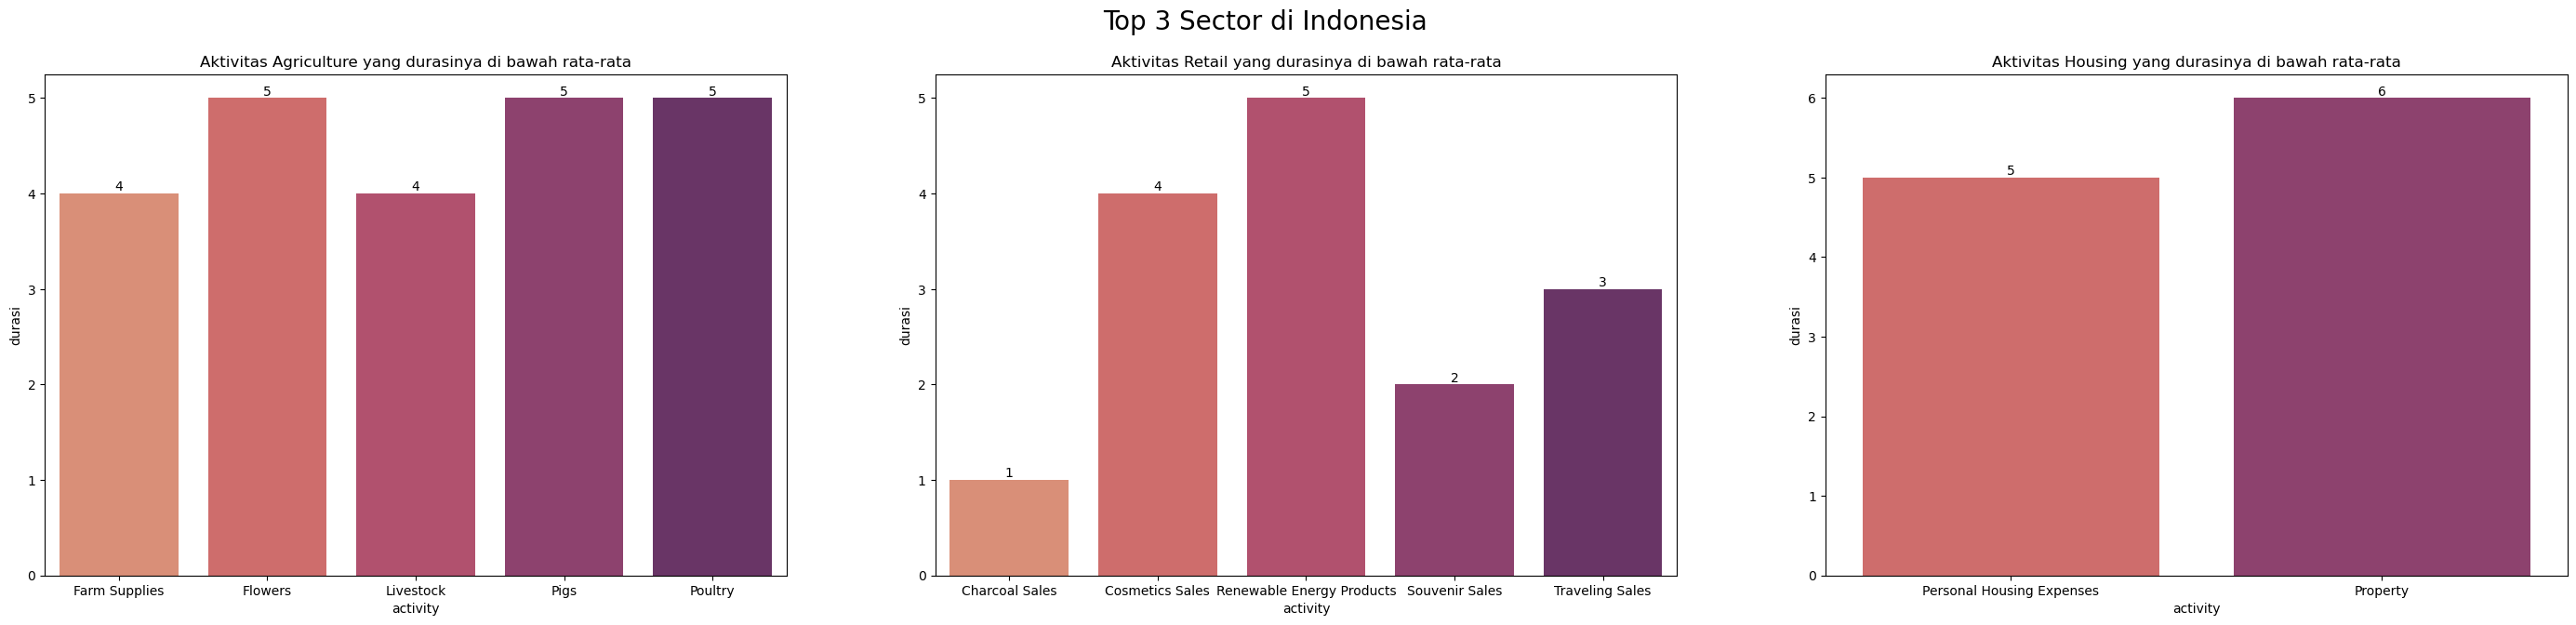

In [238]:
plt.figure(figsize=(35,7))
plt.subplot(1,3,1) # n baris, n kolom, posisition 1
fig1 = sns.barplot(data=top5_ad, y='durasi', x='activity', palette= 'flare')
plt.title('Aktivitas Agriculture yang durasinya di bawah rata-rata')
for container in fig1.containers:
    fig1.bar_label(container)

plt.subplot(1,3,2) # n baris, n kolom, posisition 2
fig2 = sns.barplot(data=top5_rd, y='durasi', x='activity', palette= 'flare')
plt.title('Aktivitas Retail yang durasinya di bawah rata-rata')
for container in fig2.containers:
    fig2.bar_label(container)

plt.subplot(1,3,3) # n baris, n kolom, posisition 3
fig3 = sns.barplot(data=top5_hd, y='durasi', x='activity', palette= 'flare')
plt.title('Aktivitas Housing yang durasinya di bawah rata-rata')
for container in fig3.containers:
    fig3.bar_label(container)

plt.suptitle('Top 3 Sector di Indonesia', size = 20)

Dari analisis tersebut, dapat diambil kesimpulan bahwa untuk sektor Agriculture dari top 5 yang durasi pinjaman tercapai di bawah rata-rata, farm supplies dan livestock activity dapat dipilih, walau perbedaannya tidak jauh dari aktivitas yang lain. Sedangkan untuk sektor Retail, aktivitas yang dapat dipilih adalah Charcoal Sales. Untuk Sektor Housing yang dapat dipilih adalah Personal Housing Expenses

## Analisis 3
> Analisis top 5 aktivitas berdasarkan rentang pengembalian pinjaman di bawah rata-rata

In [185]:
c1 = data_agri[data_agri['term_in_months'] < data_agri['term_in_months'].mean()]
c2 = data_retail[data_retail['term_in_months'] < data_retail['term_in_months'].mean()]
c3 = data_housing[data_housing['term_in_months'] < data_housing['term_in_months'].mean()]

In [187]:
top5_at = c1.groupby('activity')[['term_in_months']].mean().sort_values('term_in_months').head(5).reset_index()
top5_at['activity'] = top5_at['activity'].cat.remove_unused_categories()
top5_at

,activity,term_in_months
0,Farming,7.867647
1,Pigs,7.997792
2,Agriculture,8.000000
3,Animal Sales,8.000000
4,Farm Supplies,8.000000


In [247]:
top5_rt = c2.groupby('activity')[['term_in_months']].mean().sort_values('term_in_months').head(5).reset_index()
top5_rt['activity'] = top5_rt['activity'].cat.remove_unused_categories()
top5_rt

,activity,term_in_months
0,Mobile Phones,2.000000
1,Electrical Goods,6.000000
2,Phone Use Sales,6.187500
3,Religious Articles,8.000000
4,Retail,8.909091


In [190]:
top5_ht = c3.groupby('activity')[['term_in_months']].mean().sort_values('term_in_months').head(2).reset_index()
top5_ht['activity'] = top5_ht['activity'].cat.remove_unused_categories()
top5_ht

,activity,term_in_months
0,Property,14.000000
1,Personal Housing Expenses,20.438178


Text(0.5, 0.98, 'Top 3 Sector di Indonesia')

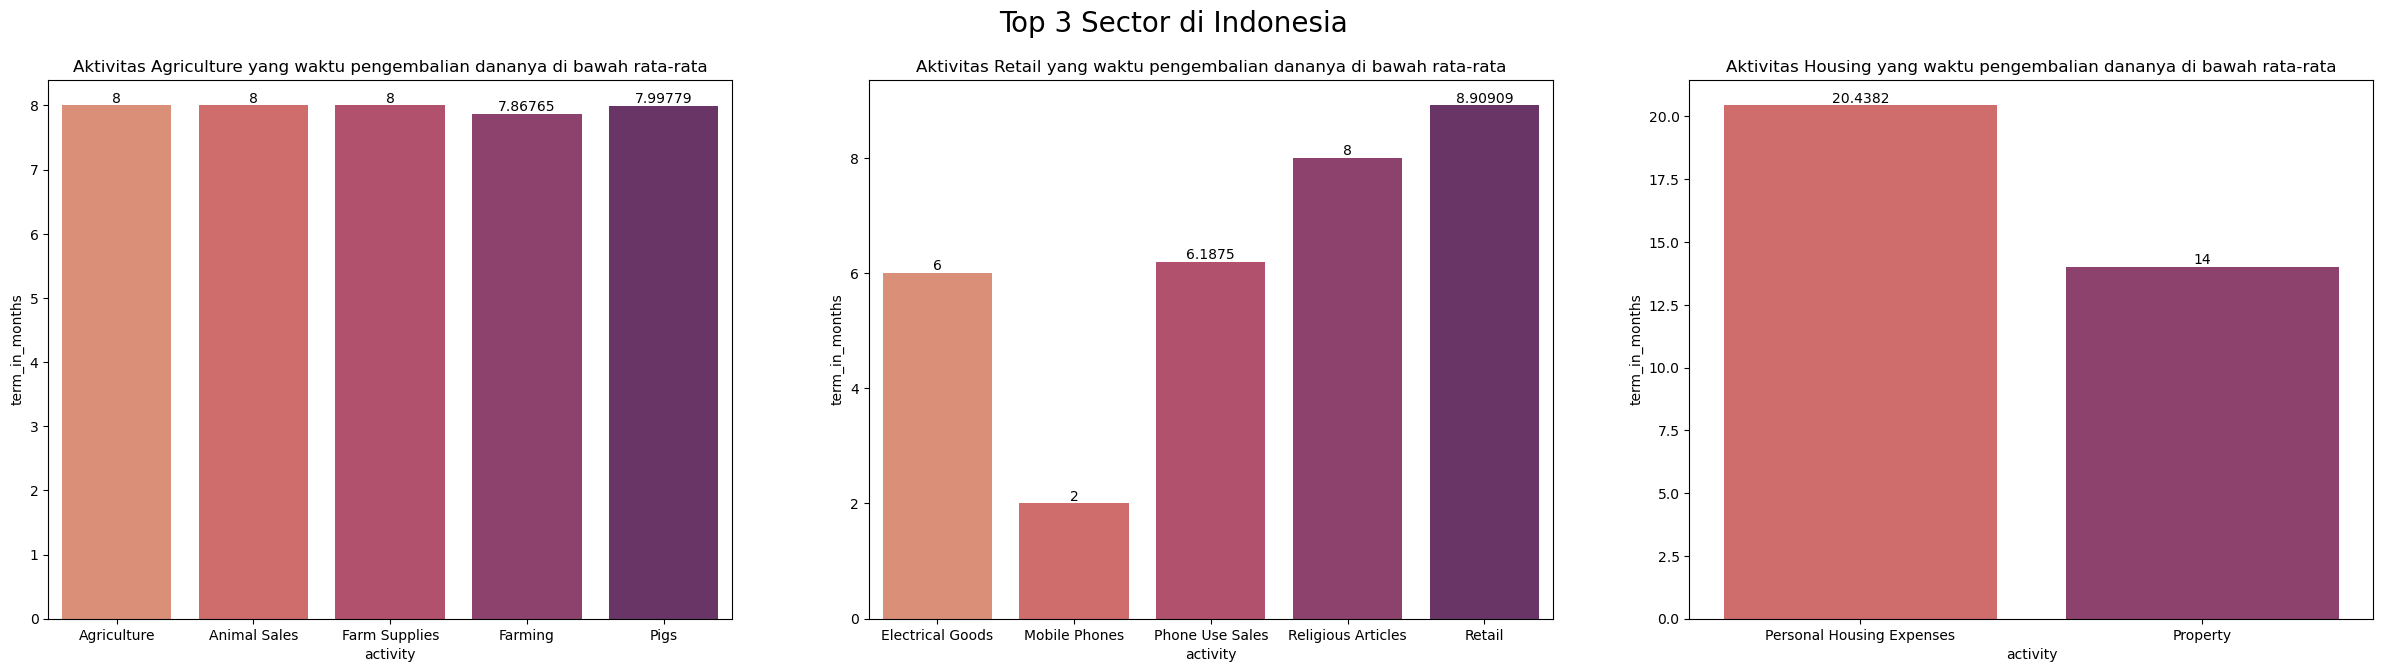

In [191]:
plt.figure(figsize=(30,7))
plt.subplot(1,3,1) # n baris, n kolom, posisition 1
fig1 = sns.barplot(data=top5_at, y='term_in_months', x='activity', palette= 'flare')
plt.title('Aktivitas Agriculture yang waktu pengembalian dananya di bawah rata-rata')
for container in fig1.containers:
    fig1.bar_label(container)

plt.subplot(1,3,2) # n baris, n kolom, posisition 2
fig2 = sns.barplot(data=top5_rt, y='term_in_months', x='activity', palette= 'flare')
plt.title('Aktivitas Retail yang waktu pengembalian dananya di bawah rata-rata')
for container in fig2.containers:
    fig2.bar_label(container)

plt.subplot(1,3,3) # n baris, n kolom, posisition 3
fig3 = sns.barplot(data=top5_ht, y='term_in_months', x='activity', palette= 'flare')
plt.title('Aktivitas Housing yang waktu pengembalian dananya di bawah rata-rata')
for container in fig3.containers:
    fig3.bar_label(container)

plt.suptitle('Top 3 Sector di Indonesia', size = 20)

Dari analisis tersebut, Top 5 aktivitas yang waktu pengembalian dananya di bawah rata-rata dari sektor Agriculture tidak berbeda jauh, untuk sektor Retail mobile phone dapat dipilih, sedangkan untuk sektor Housing propertylah yang memiliki rata-rata waktu terkecil.

## Analisis 4
> Analisis top 5 aktivitas berdasarkan repayment intervalnya, dalam analisis ini dipilih hanya 'monthly'

Perbandingan Repayment Interval
1. Irregular: Pembayaran dilakukan secara tidak teratur, tergantung pada arus kas peminjam. 
    - Risiko tinggi: sulit untuk memprediksi kapan peminjam akan membayar karena tidak terjadwal
2. Bullet: Peminjam membayar kembali pinjaman secara sekaligus pada akhir periode pinjaman.
    - Risiko sedang: akan menjadi tantangan jika peminjam tidak memiliki pendapatan yang stabil.
3. Monthly: Peminjam membayar kembali pinjaman dalam cicilan bulanan yang tetap.
    - Risiko rendah: lebih terpercaya karena peminjam cenderung memiliki pendapatan yang stabil sehingga dapat melakukan pembayaran secara teratur.

Oleh karena itu, analisis terkait Repayment Interval akan fokus kepada pembayaran monthly

In [ ]:
k1 = data_agri[data_agri['repayment_interval'] == 'monthly']
k2 = data_retail[data_retail['repayment_interval'] == 'monthly']
k3 = data_housing[data_housing['repayment_interval'] == 'monthly']


In [213]:
top5_ar = k1.groupby('activity')[['repayment_interval']].count().sort_values(by='repayment_interval', ascending=False).head(5).reset_index()
top5_ar['activity'] = top5_ar['activity'].cat.remove_unused_categories()
top5_ar

,activity,repayment_interval
0,Farming,22
1,Pigs,10
2,Poultry,10
3,Animal Sales,2
4,Livestock,2


In [249]:
top5_rr = k2.groupby('activity')[['repayment_interval']].count().sort_values(by='repayment_interval', ascending=False).head(5).reset_index()
top5_rr['activity'] = top5_rr['activity'].cat.remove_unused_categories()
top5_rr

,activity,repayment_interval
0,General Store,34
1,Retail,7
2,Renewable Energy Products,4
3,Home Products Sales,4
4,Traveling Sales,4


In [216]:
top5_hr = k3.groupby('activity')[['repayment_interval']].count().sort_values(by='repayment_interval', ascending=False).head(2).reset_index()
top5_hr['activity'] = top5_hr['activity'].cat.remove_unused_categories()
top5_hr

,activity,repayment_interval
0,Personal Housing Expenses,9
1,Property,1


Text(0.5, 0.98, 'Top 3 Sector di Indonesia')

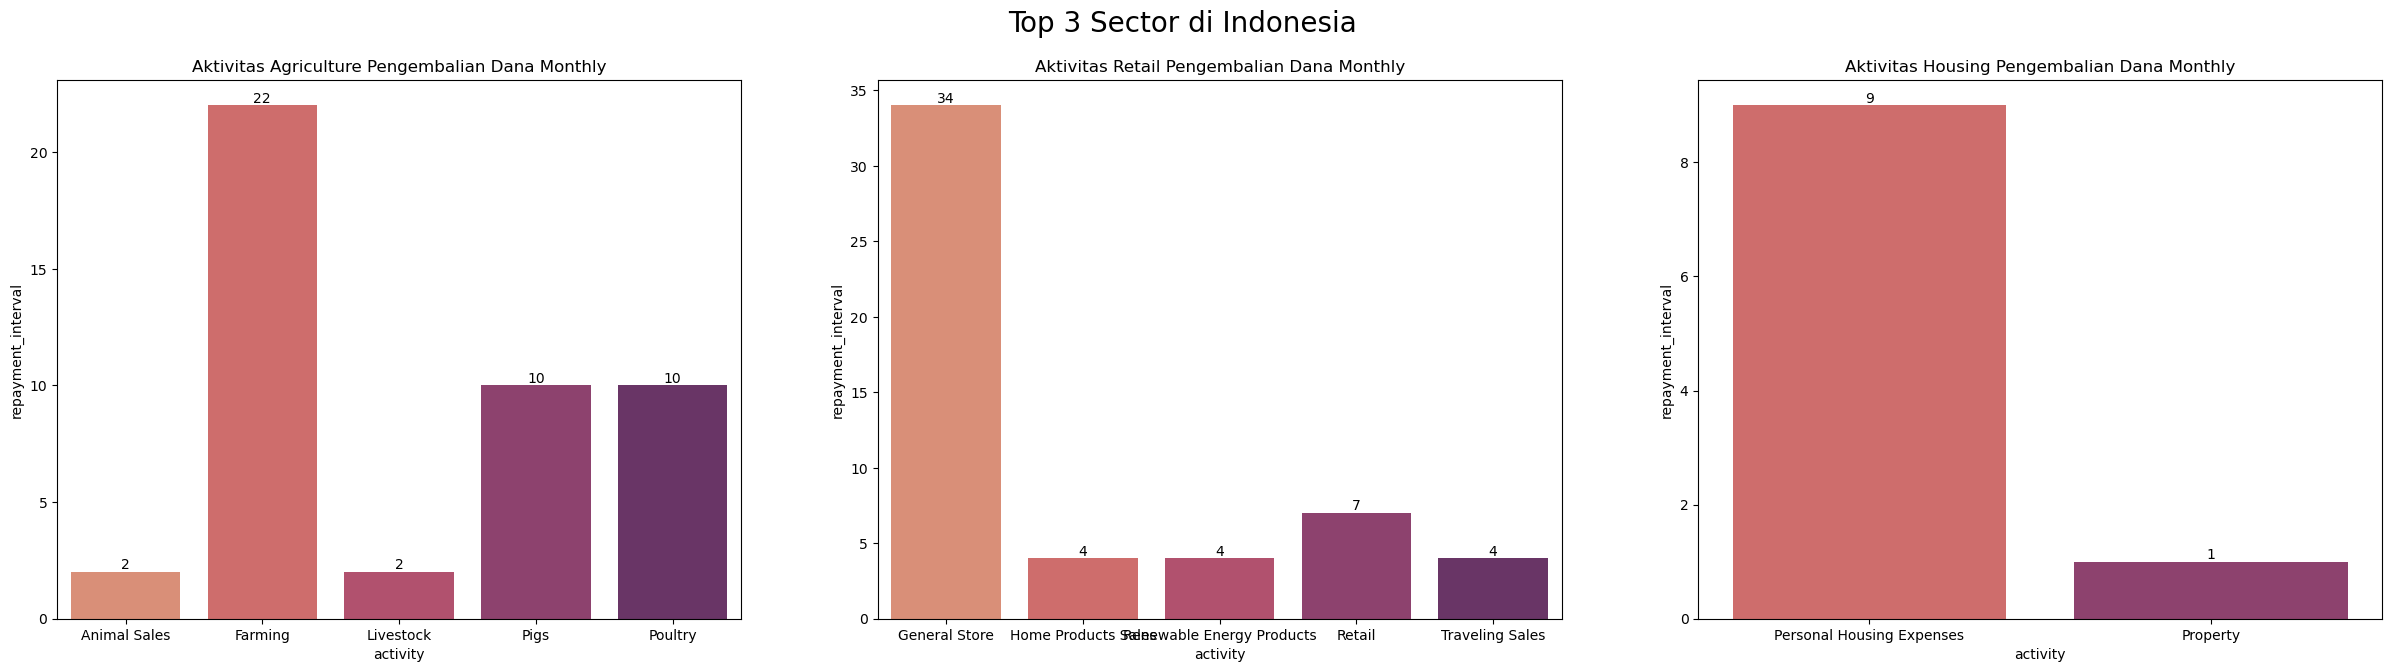

In [218]:
plt.figure(figsize=(30,7))
plt.subplot(1,3,1) # n baris, n kolom, posisition 1
fig1 = sns.barplot(data=top5_ar, y='repayment_interval', x='activity', palette= 'flare')
plt.title('Aktivitas Agriculture Pengembalian Dana Monthly')
for container in fig1.containers:
    fig1.bar_label(container)

plt.subplot(1,3,2) # n baris, n kolom, posisition 2
fig2 = sns.barplot(data=top5_rr, y='repayment_interval', x='activity', palette= 'flare')
plt.title('Aktivitas Retail Pengembalian Dana Monthly')
for container in fig2.containers:
    fig2.bar_label(container)

plt.subplot(1,3,3) # n baris, n kolom, posisition 3
fig3 = sns.barplot(data=top5_hr, y='repayment_interval', x='activity', palette= 'flare')
plt.title('Aktivitas Housing Pengembalian Dana Monthly')
for container in fig3.containers:
    fig3.bar_label(container)

plt.suptitle('Top 3 Sector di Indonesia', size = 20)

Dari analisis di atas, untuk top 5 aktivitas berdasarkan pengembalian dana dengan 'Monthly', Farming dapat dipilih dari sektor Agriculture, General Store untuk sektor Retail, dan Personal Housing Expenses untuk sektor Housing

In [251]:
data_agri[data_agri['use'] == '-']

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval,durasi,amount/lender
378669,1025209,300.0,300.0,Poultry,Agriculture,-,Indonesia,-,IDR,82.0,2016-02-19 02:09:05+00:00,2016-03-18 11:26:36+00:00,38.0,10,monthly,28 days 09:17:31,30.0


In [252]:
data_retail[data_retail['use'] == '-']

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval,durasi,amount/lender
29994,682863,375.0,375.0,Traveling Sales,Retail,-,Indonesia,-,IDR,82.0,2014-03-13 02:57:29+00:00,2014-03-16 17:41:09+00:00,38.0,14,monthly,3 days 14:43:40,26.785714
53935,706042,350.0,350.0,Shoe Sales,Retail,-,Indonesia,-,IDR,129.0,2014-05-06 05:41:03+00:00,2014-05-18 14:41:33+00:00,38.0,11,monthly,12 days 09:00:30,31.818182
176983,825073,800.0,800.0,Renewable Energy Products,Retail,-,Indonesia,-,IDR,304.0,2015-01-08 01:41:55+00:00,2015-01-14 02:18:44+00:00,14.0,28,bullet,6 days 00:36:49,28.571429


In [253]:
data_housing[data_housing['use'] == '-']

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval,durasi,amount/lender
51541,704031,650.0,650.0,Personal Housing Expenses,Housing,-,Indonesia,-,IDR,129.0,2014-04-29 09:21:38+00:00,2014-05-20 11:46:59+00:00,38.0,25,monthly,21 days 02:25:21,26.0


## Kesimpulan

Sebagai karyawan perusahaan yang berada di Indonesia ini, saya terlebih dahulu memilih peminjam yang berada di Indonesia untuk dibantu. Setelah itu saya membagi data menjadi hanya pinjaman yang tercapai saja, ini untuk melihat ketertarikan orang-orang ingin membantu dalam sektor apa. Kemudian saya mengambil hanya 3 data sektor dengan pemberi pinjaman terbanyak, yaitu Agriculture, Retail, dan Housing untuk dianalisis lebih lanjut. Alasan tambahan untuk memilih 3 data ini juga karena hanya sedikit sekali 'use' dari data yang tidak ada, yaitu 1 untuk agriculture, 3 untuk retail, dan 1 untuk housing, sehingga dapat diambil kesimpulan orang-orang yang memilih untuk meminjamkan pada data ini tau tujuan pinjamannya.
Dari 4 analisis yang saya lakukan, didapatkan kesimpulan:
1. Dalam sektor Agriculture, aktivitas yang dapat dipilih untuk diberi dana pinjaman adalah `Agriculture` dan `Farming`, Agriculture dapat dipilih dikarenakan rata-rata amount/lendernya tertinggi dari aktivitas lain kemudian durasi pinjaman tercapainya juga hanya 5 hari sehingga dari sini dapat dilihat bahwa banyak orang tertarik meminjamkan dana pada aktivitas ini. Selain itu waktu pengembalian dananya juga termasuk top 5 di bawah rata-rata walau banyak yang membayar dengan cara bullet, tapi dapat disimpulkan aktivitas ini memiliki resiko rendah. Sedangkan Farming dapat dipilih karena termasuk top 5 aktivitas yang waktu pengembalian di bawah rata-rata dan juga merupakan pembayaran monthly tertinggi, dari sini dapat disimpulkan bahwa Farming memiliki tingkat risiko yang rendah.
2. Dalam sektor Retail, aktivitas `Renewable Energy Product Activity` dan `Retail` dapat dipilih karena dua aktivitas ini berada di top 5 dari 2/4 analisis.
3. Dalam sektor Housing, aktivitas terbaik yang dapat dipilih adalah `Personal Housing Expenses` karena 3 dari 4 analisis menunjukkan bahwa ini aktivitas yang paling mungkin untuk dipilih karena resikonya rendah.